In [20]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from nilearn.image import load_img
from nilearn.plotting import plot_design_matrix
from nilearn.glm.first_level import make_first_level_design_matrix, FirstLevelModel

In [2]:
base_dir = '/home/ubuntu/data/social-risk'
behav_path = os.path.join(base_dir, 'analysis')

In [3]:
# Load the behav data
subjInfo = pd.read_csv(os.path.join(behav_path, 'SubjInfo.csv'))
bbt = pd.read_csv(os.path.join(behav_path, 'BevBigTable.csv'), index_col=[0,1,2])
bbt_raw = pd.read_csv(os.path.join(behav_path, 'BevBigTableRaw.csv'))
wtpT = pd.read_csv(os.path.join(behav_path, 'WTPTable.csv'))

bbt.index = bbt.index.set_levels([bbt.index.levels[0].map(lambda x: f'SUBJ_{x:02d}')] + bbt.index.levels[1:])

In [4]:
sub = 'SUBJ_01'
sub_dir = os.path.join(base_dir, sub, 'func')

In [5]:
# Load the imaging data
runs = [os.path.join(sub_dir, f'swra{sub}_sess{i}.nii') for i in range(1,4)]
counfounds = [os.path.join(sub_dir, f'rp_a{sub}_sess{i}.txt') for i in range(1,4)]
# check that files exist
for run, confound in zip(runs, counfounds):
    assert os.path.exists(run)
    assert os.path.exists(confound)

In [21]:
behav = bbt.loc[sub]

In [27]:
behav.head(5)

trialCond  trialSocial  trialJuice  trialEye  trialHand  riskyEv  \
run trial                                                                     
1   1              4            0           1         0          1        5   
    2              2            1           0         0          1        4   
    3              3            0           1         1          0        4   
    4              4            0           1         0          1        4   
    5              4            0           1         0          1        5   

           riskyLow  riskyHigh  riskyRisk  safeEv  ...  durationOPT2  \
run trial                                          ...                 
1   1             2          8          9       5  ...         1.506   
    2             0          8         16       4  ...         1.505   
    3             1          7          9       5  ...         1.506   
    4             2          6          4       6  ...         1.503   
    5             1          9         16       6  ...         1.504   

           durationISI2  durationDEC  durationFBK        DV  DVChosen  \
run trial                                                               
1   1             3.114        0.833        1.007 -0.166848  0.175272   
    2             2.989        1.257        1.003  0.324949  0.324949   
    3             2.919        1.618        1.003 -0.340910  0.349334   
    4             3.000        0.744        1.003  0.972428  0.972428   
    5             4.066        0.646        1.003  0.199656 -0.191232   

           DVTaskDep  DVChosenTaskDep  WTPOpt1  WTPOpt2  
run trial                                                
1   1      -1.586187         2.497835      452      449  
    2      -2.778063        -2.778063      416      416  
    3       1.755510        -0.843862      397      449  
    4       1.174721         1.174721      540      408  
    5      -2.630621         3.542270      540      471  

[5 rows x 48 columns]

# Load SPM design matrix

In [12]:
spm_X = '/home/ubuntu/data/social-risk/analysis/samples/glm2_dm.csv'
spm_X = pd.read_csv(spm_X)

<Axes: label='conditions', ylabel='scan number'>

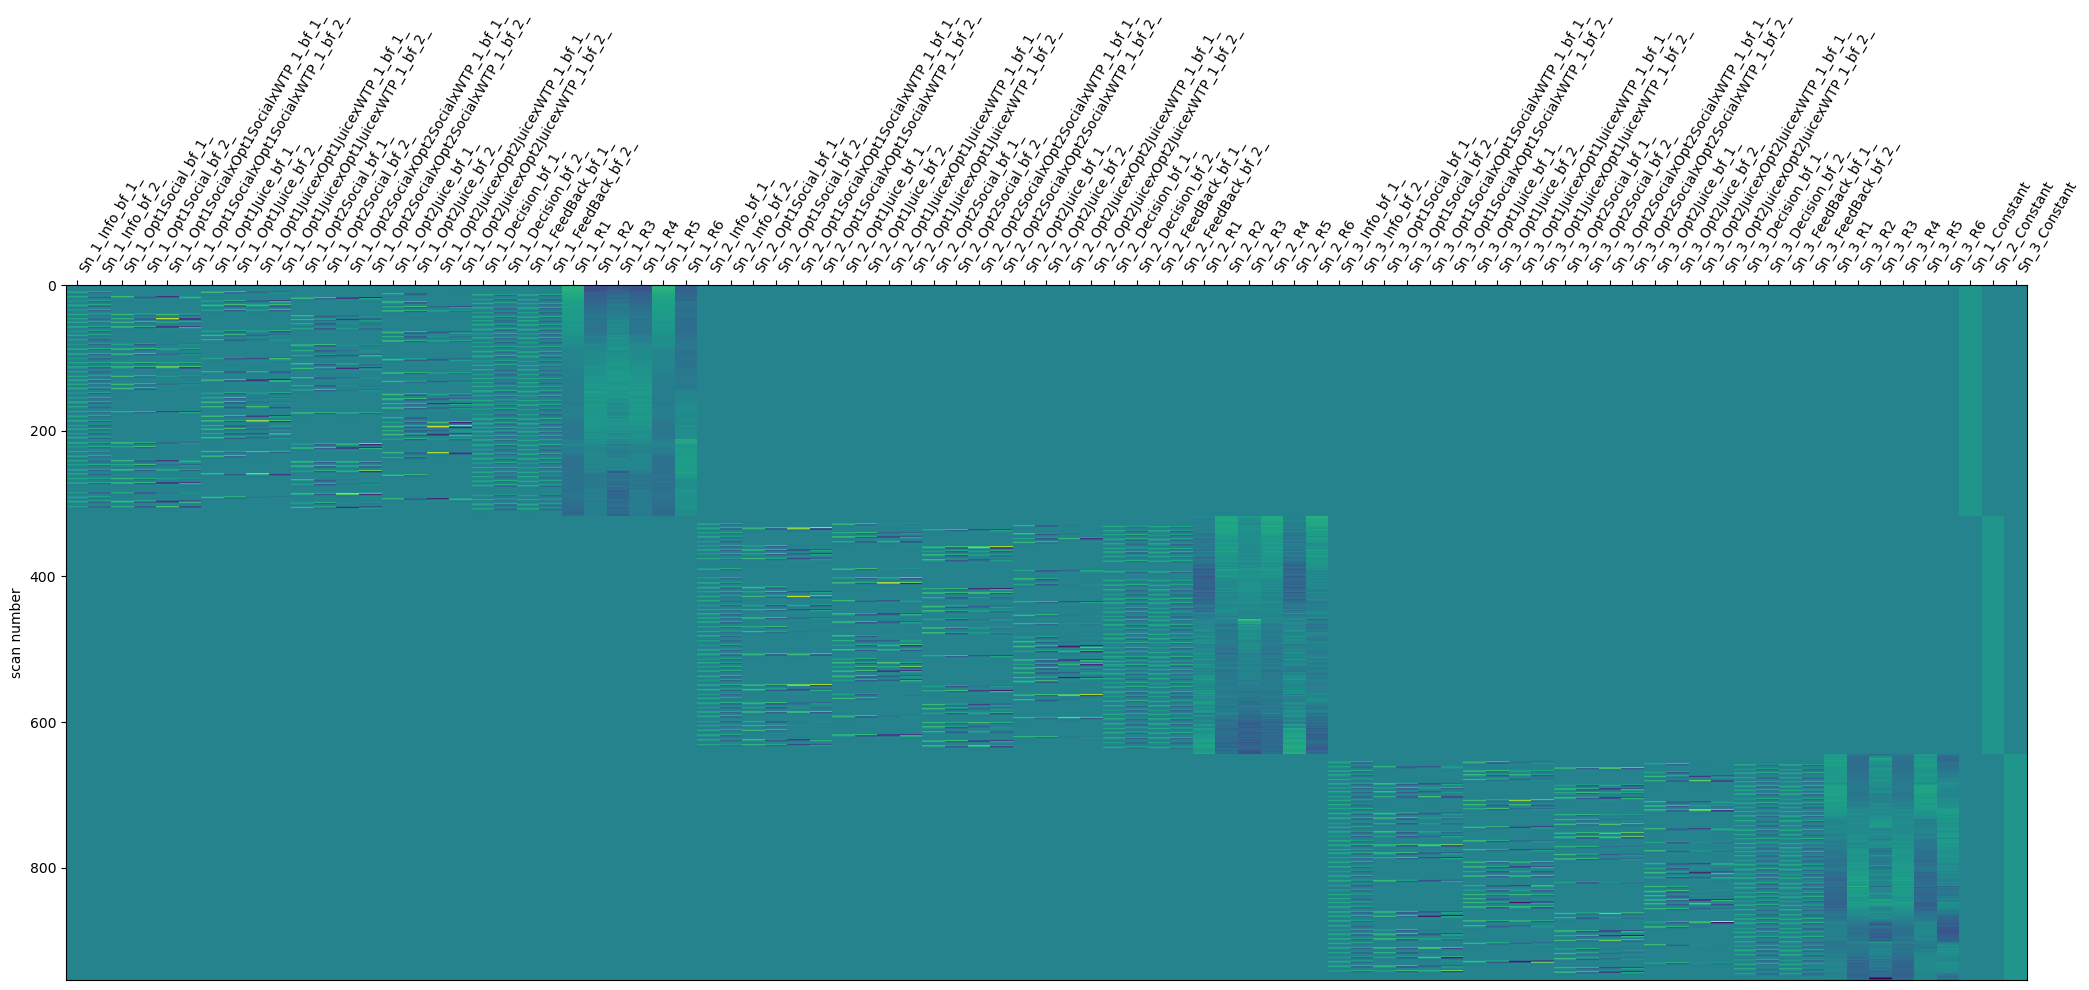

In [18]:
plot_design_matrix(spm_X)

In [176]:
spm_X.columns[spm_X.columns.str.startswith('Sn_1_')]

Index(['Sn_1_Info_bf_1_', 'Sn_1_Info_bf_2_', 'Sn_1_Opt1Social_bf_1_',
       'Sn_1_Opt1Social_bf_2_', 'Sn_1_Opt1SocialxOpt1SocialxWTP_1_bf_1_',
       'Sn_1_Opt1SocialxOpt1SocialxWTP_1_bf_2_', 'Sn_1_Opt1Juice_bf_1_',
       'Sn_1_Opt1Juice_bf_2_', 'Sn_1_Opt1JuicexOpt1JuicexWTP_1_bf_1_',
       'Sn_1_Opt1JuicexOpt1JuicexWTP_1_bf_2_', 'Sn_1_Opt2Social_bf_1_',
       'Sn_1_Opt2Social_bf_2_', 'Sn_1_Opt2SocialxOpt2SocialxWTP_1_bf_1_',
       'Sn_1_Opt2SocialxOpt2SocialxWTP_1_bf_2_', 'Sn_1_Opt2Juice_bf_1_',
       'Sn_1_Opt2Juice_bf_2_', 'Sn_1_Opt2JuicexOpt2JuicexWTP_1_bf_1_',
       'Sn_1_Opt2JuicexOpt2JuicexWTP_1_bf_2_', 'Sn_1_Decision_bf_1_',
       'Sn_1_Decision_bf_2_', 'Sn_1_FeedBack_bf_1_', 'Sn_1_FeedBack_bf_2_',
       'Sn_1_R1', 'Sn_1_R2', 'Sn_1_R3', 'Sn_1_R4', 'Sn_1_R5', 'Sn_1_R6',
       'Sn_1_Constant'],
      dtype='object')

In [41]:
behav.columns

Index(['trialCond', 'trialSocial', 'trialJuice', 'trialEye', 'trialHand',
       'riskyEv', 'riskyLow', 'riskyHigh', 'riskyRisk', 'safeEv', 'safeLow',
       'safeHigh', 'safeRisk', 'presentaionSeq', 'gamblePosition', 'select',
       'errorID', 'RT', 'coinToss', 'symbolPositionID', 'riskOpt1', 'evOpt1',
       'riskOpt2', 'evOpt2', 'riskCoeffVarOpt1', 'riskCoeffVarOpt2',
       'onsetITI', 'onsetINF', 'onsetOPT1', 'onsetISI1', 'onsetOPT2',
       'onsetISI2', 'onsetDEC', 'onsetFBK', 'durationITI', 'durationINF',
       'durationOPT1', 'durationISI1', 'durationOPT2', 'durationISI2',
       'durationDEC', 'durationFBK', 'DV', 'DVChosen', 'DVTaskDep',
       'DVChosenTaskDep', 'WTPOpt1', 'WTPOpt2'],
      dtype='object')

# Create a design matrix

In [38]:
TR = 3.
noise_model = 'ar1'
hrf_model = 'spm + derivative'

In [31]:
imgs = [load_img(run) for run in runs]
n_scans = [img.shape[-1] for img in imgs]

In [32]:
ft1 = np.arange(n_scans[0]) * TR
ft2 = np.arange(n_scans[1]) * TR + n_scans[0] * TR
ft3 = np.arange(n_scans[2]) * TR + (n_scans[0] + n_scans[1]) * TR

frametimes = np.concatenate([ft1, ft2, ft3])

In [39]:
# handle offset of sessions
offsets = [0, n_scans[0] * TR, (n_scans[0] + n_scans[1]) * TR]
offsets

[0, 954.0, 1935.0]

In [145]:
behav.columns

Index(['trialCond', 'trialSocial', 'trialJuice', 'trialEye', 'trialHand',
       'riskyEv', 'riskyLow', 'riskyHigh', 'riskyRisk', 'safeEv', 'safeLow',
       'safeHigh', 'safeRisk', 'presentaionSeq', 'gamblePosition', 'select',
       'errorID', 'RT', 'coinToss', 'symbolPositionID', 'riskOpt1', 'evOpt1',
       'riskOpt2', 'evOpt2', 'riskCoeffVarOpt1', 'riskCoeffVarOpt2',
       'onsetITI', 'onsetINF', 'onsetOPT1', 'onsetISI1', 'onsetOPT2',
       'onsetISI2', 'onsetDEC', 'onsetFBK', 'durationITI', 'durationINF',
       'durationOPT1', 'durationISI1', 'durationOPT2', 'durationISI2',
       'durationDEC', 'durationFBK', 'DV', 'DVChosen', 'DVTaskDep',
       'DVChosenTaskDep', 'WTPOpt1', 'WTPOpt2'],
      dtype='object')

In [95]:
behav_offset = behav.copy()
for i, run in enumerate([1, 2, 3]):
    mask = behav_offset.index.get_level_values(0) == run
    for col in behav_offset.columns[behav_offset.columns.str.contains('onset')]:
        behav_offset.loc[mask, col] = behav_offset.loc[mask, col] + offsets[i]

In [154]:
# masks
mask_social = behav_offset['trialSocial'] == 1
mask_juice = behav_offset['trialJuice'] == 1

# Info event
df_info = pd.DataFrame({
    'trial_type': 'Info',
    'onset': behav_offset['onsetINF'],
    'duration': 0,
    'run': behav_offset.index.get_level_values(0),
    'trial': behav_offset.index.get_level_values(1)
})
# Opt1Social event
df_opt1_social = pd.DataFrame({
    'trial_type': 'Opt1Social',
    'onset': behav_offset[mask_social]['onsetOPT1'],
    'duration': 0,
    'run': behav_offset[mask_social].index.get_level_values(0),
    'trial': behav_offset[mask_social].index.get_level_values(1),
    'pmod_EV': behav_offset.loc[mask_social, 'evOpt1'],
    'pmod_Risk': behav_offset.loc[mask_social, 'riskOpt1']
})

# Opt1Juice event
df_opt1_juice = pd.DataFrame({
    'trial_type': 'Opt1Juice',
    'onset': behav_offset[mask_juice]['onsetOPT1'],
    'duration': 0,
    'run': behav_offset[mask_juice].index.get_level_values(0),
    'trial': behav_offset[mask_juice].index.get_level_values(1),
    'pmod_EV': behav_offset.loc[mask_juice, 'evOpt1'],
    'pmod_Risk': behav_offset.loc[mask_juice, 'riskOpt1']
})

# Opt2Social event
df_opt2_social = pd.DataFrame({
    'trial_type': 'Opt2Social',
    'onset': behav_offset[mask_social]['onsetOPT2'],
    'duration': 0,
    'run': behav_offset[mask_social].index.get_level_values(0),
    'trial': behav_offset[mask_social].index.get_level_values(1),
    'pmod_EV': behav_offset.loc[mask_social, 'evOpt2'],
    'pmod_Risk': behav_offset.loc[mask_social, 'riskOpt2']
})

# Opt2Juice event
df_opt2_juice = pd.DataFrame({
    'trial_type': 'Opt2Juice',
    'onset': behav_offset[mask_juice]['onsetOPT2'],
    'duration': 0,
    'run': behav_offset[mask_juice].index.get_level_values(0),
    'trial': behav_offset[mask_juice].index.get_level_values(1),
    'pmod_EV': behav_offset.loc[mask_juice, 'evOpt2'],
    'pmod_Risk': behav_offset.loc[mask_juice, 'riskOpt2']
})

# Decision event
df_decision = pd.DataFrame({
    'trial_type': 'Decision',
    'onset': behav_offset['onsetDEC'],
    'duration': 0,
    'run': behav_offset.index.get_level_values(0),
    'trial': behav_offset.index.get_level_values(1)
})

# Feedback event
df_feedback = pd.DataFrame({
    'trial_type': 'Feedback',
    'onset': behav_offset['onsetFBK'],
    'duration': 0,
    'run': behav_offset.index.get_level_values(0),
    'trial': behav_offset.index.get_level_values(1)
})

In [178]:
# Put it all together
events = pd.concat([df_info, df_opt1_social, df_opt1_juice, df_opt2_social, df_opt2_juice, df_decision, df_feedback],
                   ignore_index=True)

events = events.sort_values(by='onset').reset_index(drop=True)

In [179]:
# split sessions
events['trial_type'] = 'Sn_' + events['run'].astype(str) + '_' + events['trial_type']
events

,trial_type,onset,duration,run,trial,pmod_EV,pmod_Risk
0,Sn_1_Info,26.892,0,1,1,NaN,NaN
1,Sn_1_Opt1Juice,27.095,0,1,1,5.0,1.0
2,Sn_1_Opt2Juice,32.920,0,1,1,5.0,9.0
3,Sn_1_Decision,37.540,0,1,1,NaN,NaN
4,Sn_1_Feedback,38.373,0,1,1,NaN,NaN
...,...,...,...,...,...,...,...
715,Sn_3_Info,2820.119,0,3,48,NaN,NaN
716,Sn_3_Opt1Social,2820.127,0,3,48,6.0,9.0
717,Sn_3_Opt2Social,2825.784,0,3,48,4.0,1.0
718,Sn_3_Decision,2831.177,0,3,48,NaN,NaN


In [180]:
make_first_level_design_matrix(frametimes, events, hrf_model=hrf_model, drift_model=None)

/home/ubuntu/miniforge3/envs/neuroim/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:142: UserWarning: The following conditions contain events with null duration:
Sn_1_Info, Sn_1_Opt1Juice, Sn_1_Opt2Juice, Sn_1_Decision, Sn_1_Feedback, Sn_1_Opt1Social, Sn_1_Opt2Social, Sn_2_Info, Sn_2_Opt1Juice, Sn_2_Opt2Juice, Sn_2_Decision, Sn_2_Feedback, Sn_2_Opt1Social, Sn_2_Opt2Social, Sn_3_Info, Sn_3_Opt1Juice, Sn_3_Opt2Juice, Sn_3_Decision, Sn_3_Feedback, Sn_3_Opt1Social, Sn_3_Opt2Social.
  warnings.warn(
/home/ubuntu/miniforge3/envs/neuroim/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: trial, run, pmod_Risk, pmod_EV
  warnings.warn(


,Sn_1_Decision,Sn_1_Decision_derivative,Sn_1_Feedback,Sn_1_Feedback_derivative,Sn_1_Info,Sn_1_Info_derivative,Sn_1_Opt1Juice,Sn_1_Opt1Juice_derivative,Sn_1_Opt1Social,Sn_1_Opt1Social_derivative,...,Sn_3_Info_derivative,Sn_3_Opt1Juice,Sn_3_Opt1Juice_derivative,Sn_3_Opt1Social,Sn_3_Opt1Social_derivative,Sn_3_Opt2Juice,Sn_3_Opt2Juice_derivative,Sn_3_Opt2Social,Sn_3_Opt2Social_derivative,constant
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0
6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0
9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0
12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000007,0.0,0.0,-0.000013,0.000007,0.0,0.0,-0.000164,0.000065,1.0
2853.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,-0.000047,0.000022,1.0
2856.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,-0.000011,0.000006,1.0
2859.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0
